### Your task now is to construct a neural network (in Keras) that learns clasification on "reuters" data set from Keras. Try to optimize and regularize it with the methods you have learned in class and by going thrugh this notebook. What is the best validation dataset score you can achieve?

Here's what you should take away from this example:

- If you are trying to classify data points between N classes, your network should end with a Dense layer of size N.
- In a single-label, multi-class classification problem, your network should end with a softmax activation, so that it will output a probability distribution over the N output classes.
- Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the network, and the true distribution of the targets.
- There are two ways to handle labels in multi-class classification: Encoding the labels via "categorical encoding" (also known as "one-hot encoding") and using categorical_crossentropy as your loss function. Encoding the labels as integers and using the sparse_categorical_crossentropy loss function.
- If you need to classify data into a large number of categories, then you should avoid creating information bottlenecks in your network by having intermediate layers that are too small.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize']=12,10



import numpy as np
import random
import os

import warnings
warnings.filterwarnings('ignore')

np.random.seed(21)

In [2]:
import keras
keras.__version__
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
from keras import optimizers
from keras import losses
from keras import metrics
from keras import regularizers

Using TensorFlow backend.


Download Reuters dataset with restriction for first 10000 examples

In [3]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
print(len(train_data), len(test_data))

8982 2246


In [5]:
train_data[1]

[1,
 3267,
 699,
 3434,
 2295,
 56,
 2,
 7511,
 9,
 56,
 3906,
 1073,
 81,
 5,
 1198,
 57,
 366,
 737,
 132,
 20,
 4093,
 7,
 2,
 49,
 2295,
 2,
 1037,
 3267,
 699,
 3434,
 8,
 7,
 10,
 241,
 16,
 855,
 129,
 231,
 783,
 5,
 4,
 587,
 2295,
 2,
 2,
 775,
 7,
 48,
 34,
 191,
 44,
 35,
 1795,
 505,
 17,
 12]

Decoding back to words:

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
train_labels[10]

3

## Preparing the data
Vectorize the data 

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [11]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Getting the number of classes:

In [12]:
len(list(set(train_labels)))

46

In [13]:
x_train.shape, x_test.shape

((8982, 10000), (2246, 10000))

In [14]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [15]:
num_epochs = 10
list_epochs = range(1, num_epochs+1)

In [16]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape = (10000,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [17]:
optimizer = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

In [18]:
model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [19]:
history = model.fit(x_train, one_hot_train_labels,
                   validation_data=(x_test, one_hot_test_labels),
                   epochs = num_epochs,
                   batch_size = 512,
                   verbose=1)

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 4s 489us/step - loss: 1.7626 - acc: 0.5976 - val_loss: 1.1803 - val_acc: 0.7386
Epoch 2/10
8982/8982 [==============================] - 4s 445us/step - loss: 0.7947 - acc: 0.8195 - val_loss: 1.0411 - val_acc: 0.7542
Epoch 3/10
8982/8982 [==============================] - 4s 450us/step - loss: 0.4722 - acc: 0.8942 - val_loss: 0.8794 - val_acc: 0.8037
Epoch 4/10
8982/8982 [==============================] - 4s 442us/step - loss: 0.2749 - acc: 0.9367 - val_loss: 0.9428 - val_acc: 0.7858
Epoch 5/10
8982/8982 [==============================] - 4s 448us/step - loss: 0.2110 - acc: 0.9476 - val_loss: 1.0471 - val_acc: 0.7845
Epoch 6/10
8982/8982 [==============================] - 4s 452us/step - loss: 0.1882 - acc: 0.9469 - val_loss: 1.0681 - val_acc: 0.7756
Epoch 7/10
8982/8982 [==============================] - 4s 436us/step - loss: 0.1589 - acc: 0.9510 - val_loss: 1.0208 - val_acc: 0.7988


In [20]:
score = model.evaluate(x_test, one_hot_test_labels, verbose=1)
print("Accuracy: %.2f%%" % (score[1]*100))
print('Test loss:', score[0])
print('Test accuracy', score[1])

2246/2246 [==============================] - 1s 266us/step
Accuracy: 79.07%
Test loss: 1.15001398543
Test accuracy 0.790739091772


In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

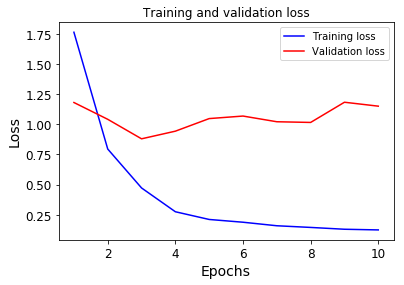

In [22]:
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(list_epochs, history.history['loss'], 'b', label='Training loss')
plt.plot(list_epochs, history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

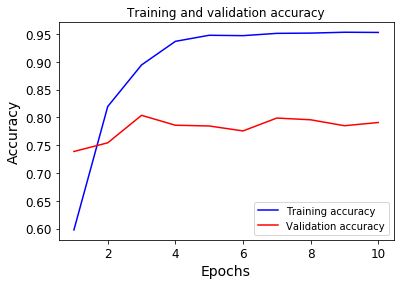

In [23]:
plt.plot(list_epochs, history.history['acc'], 'b', label='Training accuracy')
plt.plot(list_epochs, history.history['val_acc'], 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Optimization part 1: Building smaller model

In [24]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape = (10000,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [25]:
model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [26]:
history = model.fit(x_train, one_hot_train_labels,
                   validation_data=(x_test, one_hot_test_labels),
                   epochs = num_epochs,
                   batch_size = 512,
                   verbose=1)

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 2s 189us/step - loss: 2.1445 - acc: 0.5904 - val_loss: 1.3788 - val_acc: 0.7084
Epoch 2/10
8982/8982 [==============================] - 2s 178us/step - loss: 1.0672 - acc: 0.7782 - val_loss: 1.1282 - val_acc: 0.7529
Epoch 3/10
8982/8982 [==============================] - 2s 181us/step - loss: 0.7430 - acc: 0.8416 - val_loss: 0.9988 - val_acc: 0.7778
Epoch 4/10
8982/8982 [==============================] - 2s 180us/step - loss: 0.5371 - acc: 0.8878 - val_loss: 0.9670 - val_acc: 0.7885
Epoch 5/10
8982/8982 [==============================] - 2s 180us/step - loss: 0.4042 - acc: 0.9123 - val_loss: 0.9249 - val_acc: 0.7974
Epoch 6/10
8982/8982 [==============================] - 2s 180us/step - loss: 0.3040 - acc: 0.9324 - val_loss: 0.9489 - val_acc: 0.7965
Epoch 7/10
8982/8982 [==============================] - 2s 181us/step - loss: 0.2563 - acc: 0.9408 - val_loss: 0.9552 - val_acc: 0.7983


In [27]:
score_1 = model.evaluate(x_test, one_hot_test_labels, verbose=1)
print("Accuracy: %.2f%%" % (score_1[1]*100))
print('Test loss:', score_1[0])
print('Test accuracy', score_1[1])

2246/2246 [==============================] - 0s 121us/step
Accuracy: 79.30%
Test loss: 1.04851600175
Test accuracy 0.792965271647


In [53]:
print('Validation loss for:\n','Smaller model |', 'Original model')
print(score_1[0], 'vs', score[0])

Validation loss for:
 Smaller model | Original model
1.04851600175 vs 1.15001398543


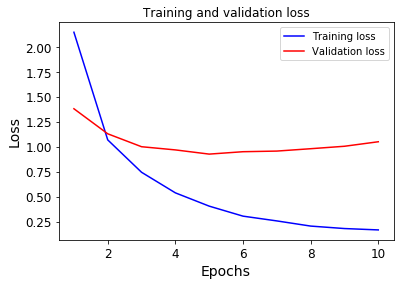

In [29]:
plt.plot(list_epochs, history.history['loss'], 'b', label='Training loss')
plt.plot(list_epochs, history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

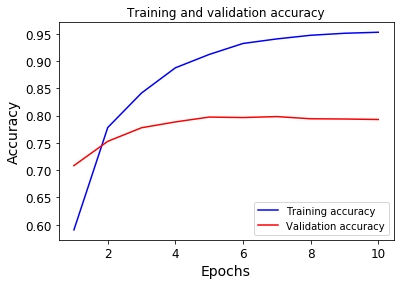

In [30]:
plt.plot(list_epochs, history.history['acc'], 'b', label='Training accuracy')
plt.plot(list_epochs, history.history['val_acc'], 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Optimization part 2: Adding Dropout 50%

In [31]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape = (10000,)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))

In [32]:
model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [33]:
history = model.fit(x_train, one_hot_train_labels,
                   validation_data=(x_test, one_hot_test_labels),
                   epochs = num_epochs,
                   batch_size = 512,
                   verbose=1)

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 2s 196us/step - loss: 2.5720 - acc: 0.4584 - val_loss: 1.6149 - val_acc: 0.6594
Epoch 2/10
8982/8982 [==============================] - 2s 182us/step - loss: 1.5513 - acc: 0.6489 - val_loss: 1.3278 - val_acc: 0.6950
Epoch 3/10
8982/8982 [==============================] - 2s 182us/step - loss: 1.2783 - acc: 0.7033 - val_loss: 1.2081 - val_acc: 0.7159
Epoch 4/10
8982/8982 [==============================] - 2s 183us/step - loss: 1.1209 - acc: 0.7424 - val_loss: 1.1219 - val_acc: 0.7431
Epoch 5/10
8982/8982 [==============================] - 2s 182us/step - loss: 0.9977 - acc: 0.7698 - val_loss: 1.0743 - val_acc: 0.7569
Epoch 6/10
8982/8982 [==============================] - 2s 184us/step - loss: 0.8805 - acc: 0.7937 - val_loss: 1.0330 - val_acc: 0.7694
Epoch 7/10
8982/8982 [==============================] - 2s 183us/step - loss: 0.7773 - acc: 0.8157 - val_loss: 1.0047 - val_acc: 0.7760


In [34]:
score_2 = model.evaluate(x_test, one_hot_test_labels, verbose=1)
print("Accuracy: %.2f%%" % (score_2[1]*100))
print('Test loss:', score_2[0])
print('Test accuracy', score_2[1])

2246/2246 [==============================] - 0s 124us/step
Accuracy: 79.07%
Test loss: 0.954721510039
Test accuracy 0.790739091719


After first optimization, difference between losses:

In [54]:
print('Validation loss for:\n', 'With dropout |', 'Smaller model |', 'Original model')
print(score_2[0], 'vs', score_1[0], 'vs', score[0])

Validation loss for:
 With dropout | Smaller model | Original model
0.954721510039 vs 1.04851600175 vs 1.15001398543


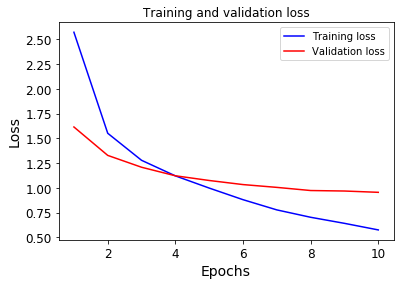

In [36]:
plt.plot(list_epochs, history.history['loss'], 'b', label='Training loss')
plt.plot(list_epochs, history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

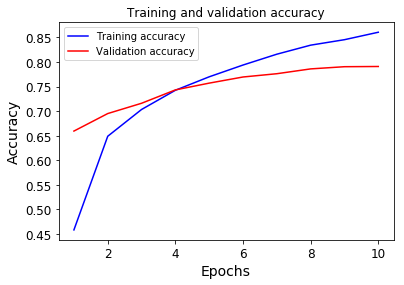

In [37]:
plt.plot(list_epochs, history.history['acc'], 'b', label='Training accuracy')
plt.plot(list_epochs, history.history['val_acc'], 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Optimization part 3: Adding decay of learning rate

In [38]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape = (10000,)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))

In [39]:
optimizer = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0001)

In [40]:
model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [41]:
history = model.fit(x_train, one_hot_train_labels,
                   validation_data=(x_test, one_hot_test_labels),
                   epochs = num_epochs,
                   batch_size = 512,
                   verbose=1)

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 2s 203us/step - loss: 2.5478 - acc: 0.4407 - val_loss: 1.6356 - val_acc: 0.6358
Epoch 2/10
8982/8982 [==============================] - 2s 185us/step - loss: 1.5968 - acc: 0.6305 - val_loss: 1.3801 - val_acc: 0.6857
Epoch 3/10
8982/8982 [==============================] - 2s 184us/step - loss: 1.3328 - acc: 0.6949 - val_loss: 1.2477 - val_acc: 0.7133
Epoch 4/10
8982/8982 [==============================] - 2s 186us/step - loss: 1.1516 - acc: 0.7326 - val_loss: 1.1514 - val_acc: 0.7444
Epoch 5/10
8982/8982 [==============================] - 2s 188us/step - loss: 1.0246 - acc: 0.7620 - val_loss: 1.0889 - val_acc: 0.7565
Epoch 6/10
8982/8982 [==============================] - 2s 188us/step - loss: 0.8990 - acc: 0.7871 - val_loss: 1.0432 - val_acc: 0.7734
Epoch 7/10
8982/8982 [==============================] - 2s 188us/step - loss: 0.8101 - acc: 0.8110 - val_loss: 0.9952 - val_acc: 0.7805


In [42]:
score_3 = model.evaluate(x_test, one_hot_test_labels, verbose=1)
print("Accuracy: %.2f%%" % (score_3[1]*100))
print('Test loss:', score_3[0])
print('Test accuracy', score_3[1])

2246/2246 [==============================] - 0s 125us/step
Accuracy: 79.16%
Test loss: 0.999311987035
Test accuracy 0.791629563722


In [52]:
print('Validation loss for:\n','Learning rate decay |', 'With dropout |', 'Smaller model |', 'Original model')
print(score_3[0], 'vs', score_2[0], 'vs', score_1[0], 'vs', score[0])

Validation loss for:
 Learning rate decay | With dropout | Smaller model | Original model
0.999311987035 vs 0.954721510039 vs 1.04851600175 vs 1.15001398543


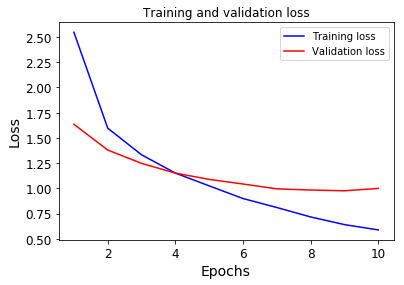

In [44]:
plt.plot(list_epochs, history.history['loss'], 'b', label='Training loss')
plt.plot(list_epochs, history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

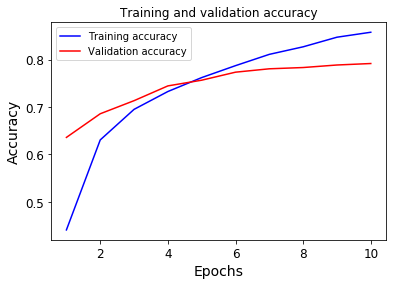

In [45]:
plt.plot(list_epochs, history.history['acc'], 'b', label='Training accuracy')
plt.plot(list_epochs, history.history['val_acc'], 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Optimization part 4: Changing optimizer to Adam with Nesterov (without LR decay)

In [153]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape = (10000,)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))

In [154]:
optimizer2 = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [155]:
model.compile(optimizer=optimizer2,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [156]:
history = model.fit(x_train, one_hot_train_labels,
                   validation_data=(x_test, one_hot_test_labels),
                   epochs = num_epochs,
                   batch_size = 512,
                   verbose=1)

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 3s 292us/step - loss: 3.1991 - acc: 0.3646 - val_loss: 2.1435 - val_acc: 0.5392
Epoch 2/10
8982/8982 [==============================] - 2s 216us/step - loss: 1.9118 - acc: 0.5637 - val_loss: 1.5642 - val_acc: 0.6594
Epoch 3/10
8982/8982 [==============================] - 2s 220us/step - loss: 1.4838 - acc: 0.6561 - val_loss: 1.3392 - val_acc: 0.6981
Epoch 4/10
8982/8982 [==============================] - 2s 212us/step - loss: 1.2471 - acc: 0.7105 - val_loss: 1.2169 - val_acc: 0.7240
Epoch 5/10
8982/8982 [==============================] - 2s 218us/step - loss: 1.1087 - acc: 0.7462 - val_loss: 1.1369 - val_acc: 0.7413
Epoch 6/10
8982/8982 [==============================] - 2s 212us/step - loss: 0.9692 - acc: 0.7697 - val_loss: 1.0840 - val_acc: 0.7614
Epoch 7/10
8982/8982 [==============================] - 2s 222us/step - loss: 0.8591 - acc: 0.8036 - val_loss: 1.0371 - val_acc: 0.7663


In [157]:
score_4 = model.evaluate(x_test, one_hot_test_labels, verbose=1)
print("Accuracy: %.2f%%" % (score_4[1]*100))
print('Test loss:', score_4[0])
print('Test accuracy', score_4[1])

2246/2246 [==============================] - 0s 132us/step
Accuracy: 78.67%
Test loss: 0.967758328811
Test accuracy 0.78673196797


In [158]:
print('Validation loss for:\n', 'Optimizer Adam |', 'Learning rate decay |', 'With dropout |', 'Smaller model |', 'Original model')
print(score_4[0], 'vs', score_3[0], 'vs', score_2[0], 'vs', score_1[0], 'vs', score[0])

Validation loss for:
 Optimizer Adam | Learning rate decay | With dropout | Smaller model | Original model
0.967758328811 vs 0.999311987035 vs 0.954721510039 vs 1.04851600175 vs 1.15001398543


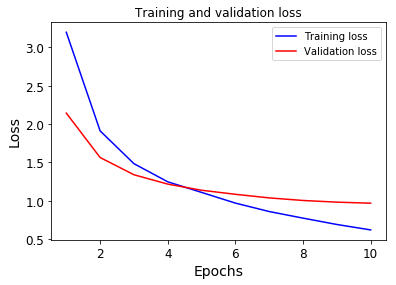

In [159]:
plt.plot(list_epochs, history.history['loss'], 'b', label='Training loss')
plt.plot(list_epochs, history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

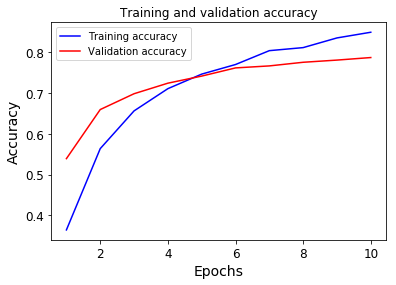

In [160]:
plt.plot(list_epochs, history.history['acc'], 'b', label='Training accuracy')
plt.plot(list_epochs, history.history['val_acc'], 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Optimization part 5: Significantly less parameters in neural network (without LR decay)

In [257]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (10000,)))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [258]:
optimizer = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

In [259]:
model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [260]:
history = model.fit(x_train, one_hot_train_labels,
                   validation_data=(x_test, one_hot_test_labels),
                   epochs = num_epochs,
                   batch_size = 512,
                   verbose=1)

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 2s 272us/step - loss: 2.5164 - acc: 0.5161 - val_loss: 1.6805 - val_acc: 0.6536
Epoch 2/10
8982/8982 [==============================] - 1s 146us/step - loss: 1.4402 - acc: 0.6856 - val_loss: 1.3220 - val_acc: 0.6999
Epoch 3/10
8982/8982 [==============================] - 1s 149us/step - loss: 1.1172 - acc: 0.7495 - val_loss: 1.1847 - val_acc: 0.7364
Epoch 4/10
8982/8982 [==============================] - 1s 151us/step - loss: 0.9250 - acc: 0.7939 - val_loss: 1.0804 - val_acc: 0.7591
Epoch 5/10
8982/8982 [==============================] - 1s 150us/step - loss: 0.7808 - acc: 0.8249 - val_loss: 1.0356 - val_acc: 0.7645
Epoch 6/10
8982/8982 [==============================] - 1s 149us/step - loss: 0.6532 - acc: 0.8534 - val_loss: 0.9761 - val_acc: 0.7796
Epoch 7/10
8982/8982 [==============================] - 1s 148us/step - loss: 0.5538 - acc: 0.8772 - val_loss: 0.9494 - val_acc: 0.7814


In [261]:
score_5 = model.evaluate(x_test, one_hot_test_labels, verbose=1)
print("Accuracy: %.2f%%" % (score_5[1]*100))
print('Test loss:', score_5[0])
print('Test accuracy', score_5[1])

2246/2246 [==============================] - 0s 165us/step
Accuracy: 79.65%
Test loss: 0.915542979168
Test accuracy 0.796527159448


In [262]:
print('Validation loss for:\n', 'Very small model |', 'Optimizer Adam |', 'Learning rate decay |', 'With dropout |', 'Smaller model |', 'Original model')
print(score_5[0], 'vs', score_4[0], 'vs', score_3[0], 'vs', score_2[0], 'vs', score_1[0], 'vs', score[0])

Validation loss for:
 Very small model | Optimizer Adam | Learning rate decay | With dropout | Smaller model | Original model
0.915542979168 vs 0.967758328811 vs 0.999311987035 vs 0.954721510039 vs 1.04851600175 vs 1.15001398543


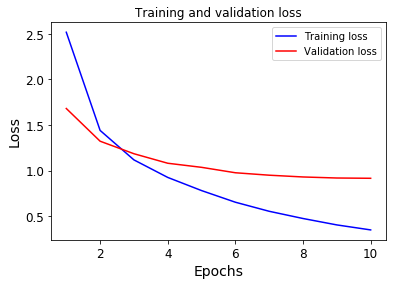

In [263]:
plt.plot(list_epochs, history.history['loss'], 'b', label='Training loss')
plt.plot(list_epochs, history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

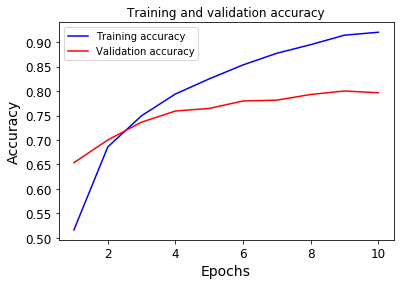

In [264]:
plt.plot(list_epochs, history.history['acc'], 'b', label='Training accuracy')
plt.plot(list_epochs, history.history['val_acc'], 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [271]:
print('Validation accuracy for:') 
print('Very small model |', 'Optimizer Adam |','Learning rate decay |', 'With dropout |', 'Smaller model |', 'Original model')
print("%.10f%% vs %.10f%% vs %.10f%% vs %.10f%% vs %.10f%% vs %.10f%%" % (score_5[1]*100, score_4[1]*100, score_3[1]*100, score_2[1]*100, score_1[1]*100, score[1]*100))

Validation accuracy for:
Very small model | Optimizer Adam | Learning rate decay | With dropout | Smaller model | Original model
79.6527159448% vs 78.6731967970% vs 79.1629563722% vs 79.0739091719% vs 79.2965271647% vs 79.0739091772%


## Regulization L2 of so far best model

In [272]:
model = Sequential()
model.add(Dense(64, kernel_regularizer=regularizers.l2(0.01), 
                activation='relu', input_shape = (10000,)))
model.add(Dropout(0.25))
model.add(Dense(64, kernel_regularizer=regularizers.l2(0.01),
                activation='relu'))
model.add(Dense(46, activation='softmax'))

In [273]:
model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [274]:
history = model.fit(x_train, one_hot_train_labels,
                   validation_data=(x_test, one_hot_test_labels),
                   epochs = num_epochs,
                   batch_size = 512,
                   verbose=1)

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 3s 302us/step - loss: 3.7778 - acc: 0.3883 - val_loss: 2.6134 - val_acc: 0.6077
Epoch 2/10
8982/8982 [==============================] - 1s 160us/step - loss: 2.3864 - acc: 0.6206 - val_loss: 2.1815 - val_acc: 0.6625
Epoch 3/10
8982/8982 [==============================] - 2s 169us/step - loss: 2.0717 - acc: 0.6837 - val_loss: 2.0069 - val_acc: 0.6776
Epoch 4/10
8982/8982 [==============================] - 2s 179us/step - loss: 1.8966 - acc: 0.7066 - val_loss: 1.8856 - val_acc: 0.7017
Epoch 5/10
8982/8982 [==============================] - 1s 167us/step - loss: 1.7853 - acc: 0.7202 - val_loss: 1.8081 - val_acc: 0.7039
Epoch 6/10
8982/8982 [==============================] - 2s 168us/step - loss: 1.7041 - acc: 0.7281 - val_loss: 1.7557 - val_acc: 0.7128
Epoch 7/10
8982/8982 [==============================] - 1s 159us/step - loss: 1.6369 - acc: 0.7383 - val_loss: 1.7003 - val_acc: 0.7119


In [275]:
score_r1 = model.evaluate(x_test, one_hot_test_labels, verbose=1)
print("Accuracy: %.2f%%" % (score_r1[1]*100))
print('Test loss:', score_r1[0])
print('Test accuracy', score_r1[1])

2246/2246 [==============================] - 0s 175us/step
Accuracy: 73.78%
Test loss: 1.59108378923
Test accuracy 0.737756010686


In [276]:
print('Validation loss for:\n', 'Regularization L2 |', 'Very small model |', 'Optimizer Adam |', 'Learning rate decay |', 'With dropout |', 'Smaller model |', 'Original model')
print(score_r1[0], 'vs', score_5[0], 'vs', score_4[0], 'vs', score_3[0], 'vs', score_2[0], 'vs', score_1[0], 'vs', score[0])

Validation loss for:
 Regularization L2 | Very small model | Optimizer Adam | Learning rate decay | With dropout | Smaller model | Original model
1.59108378923 vs 0.915542979168 vs 0.967758328811 vs 0.999311987035 vs 0.954721510039 vs 1.04851600175 vs 1.15001398543


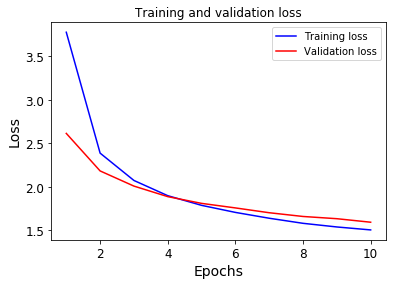

In [277]:
plt.plot(list_epochs, history.history['loss'], 'b', label='Training loss')
plt.plot(list_epochs, history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

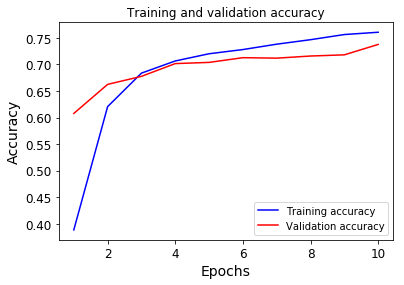

In [278]:
plt.plot(list_epochs, history.history['acc'], 'b', label='Training accuracy')
plt.plot(list_epochs, history.history['val_acc'], 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Regulization L1 and L2 of so far best model

In [280]:
model = Sequential()
model.add(Dense(64, kernel_regularizer=regularizers.l1_l2(0.01), 
                activation='relu', input_shape = (10000,)))
model.add(Dropout(0.25))
model.add(Dense(64, kernel_regularizer=regularizers.l1_l2(0.01),
                activation='relu'))
model.add(Dense(46, activation='softmax'))

In [281]:
model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [282]:
history = model.fit(x_train, one_hot_train_labels,
                   validation_data=(x_test, one_hot_test_labels),
                   epochs = num_epochs,
                   batch_size = 512,
                   verbose=1)

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 3s 353us/step - loss: 30.7293 - acc: 0.3132 - val_loss: 10.4038 - val_acc: 0.3620
Epoch 2/10
8982/8982 [==============================] - 2s 205us/step - loss: 9.7991 - acc: 0.3770 - val_loss: 9.0941 - val_acc: 0.4194
Epoch 3/10
8982/8982 [==============================] - 2s 186us/step - loss: 8.7895 - acc: 0.4463 - val_loss: 8.2964 - val_acc: 0.4947
Epoch 4/10
8982/8982 [==============================] - 2s 188us/step - loss: 8.0762 - acc: 0.4652 - val_loss: 7.6634 - val_acc: 0.5031
Epoch 5/10
8982/8982 [==============================] - 2s 207us/step - loss: 7.4843 - acc: 0.4717 - val_loss: 7.1328 - val_acc: 0.5169
Epoch 6/10
8982/8982 [==============================] - 2s 207us/step - loss: 6.9906 - acc: 0.4798 - val_loss: 6.7046 - val_acc: 0.5102
Epoch 7/10
8982/8982 [==============================] - 2s 209us/step - loss: 6.5826 - acc: 0.4817 - val_loss: 6.3314 - val_acc: 0.520

In [283]:
score_r2 = model.evaluate(x_test, one_hot_test_labels, verbose=1)
print("Accuracy: %.2f%%" % (score_r2[1]*100))
print('Test loss:', score_r2[0])
print('Test accuracy', score_r2[1])

2246/2246 [==============================] - 0s 193us/step
Accuracy: 50.93%
Test loss: 5.63627440104
Test accuracy 0.509349955503


In [284]:
print('Validation loss for:\n', 'Regularization L1_L2 |', 'Regularization L2 |', 'Very small model |', 'Optimizer Adam |', 'Learning rate decay |', 'With dropout |', 'Smaller model |', 'Original model')
print(score_r2[0], 'vs', score_r1[0], 'vs', score_5[0], 'vs', score_4[0], 'vs', score_3[0], 'vs', score_2[0], 'vs', score_1[0], 'vs', score[0])

Validation loss for:
 Regularization L1_L2 | Regularization L2 | Very small model | Optimizer Adam | Learning rate decay | With dropout | Smaller model | Original model
5.63627440104 vs 1.59108378923 vs 0.915542979168 vs 0.967758328811 vs 0.999311987035 vs 0.954721510039 vs 1.04851600175 vs 1.15001398543


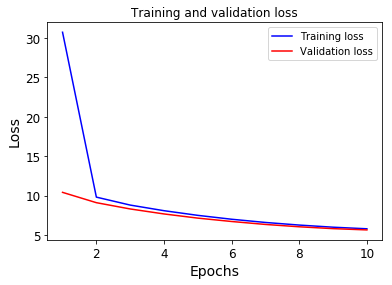

In [285]:
plt.plot(list_epochs, history.history['loss'], 'b', label='Training loss')
plt.plot(list_epochs, history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

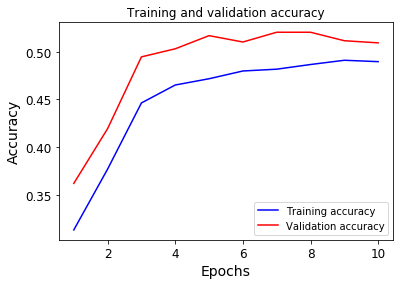

In [287]:
plt.plot(list_epochs, history.history['acc'], 'b', label='Training accuracy')
plt.plot(list_epochs, history.history['val_acc'], 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Sum up
These examples shows that optimization might significantly improve loss and accuracy.
* Smaller number of parameters - upgrade loss from 1.15 to 1.05
* Adding dropout 0.5 after each hidden layer improves loss from 1.05 to 0.95
* Setting learning rate to decay by 10% in each epoch - not upgrade loss in this example: 1.00 vs 0.95
* Changing optimizer to Adam leaves loss at same value: 0.96 vs 0.95
* Using very small model and only one dropout layer improves loss from 0.95 to 0.92

Regularization, both L2 and L2 with L1 not improves loss in this example:
* Adding L2 regularization set loss from 1.15 to 1.59
* Adding L1 with L1 regulatization worsen loss from 1.15 to 5.64